# Credit Card Approval Prediction

#### import relevant dependent libraries

In [74]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import sys
import os

from collections import defaultdict, Counter

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

sb.set_style('darkgrid')
sb.set()

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

%matplotlib inline

#### Load Dataset from local machine

In [75]:
df = pd.read_csv("D:\Open Classroom\Datasets\Credit Card Approvals (Clean Data)\clean_dataset.csv")
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


#### Analyse Statistical representation of the data

In [76]:
df.shape

(690, 16)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [78]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

#### Graphical presentation

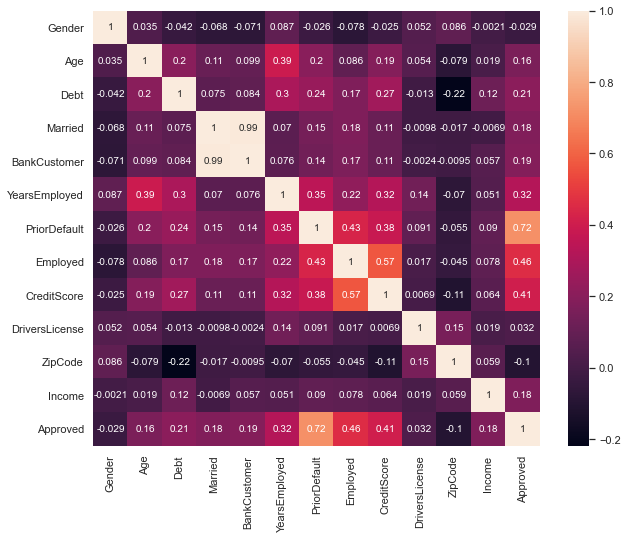

In [79]:
plt.figure(figsize = (10, 8))
sb.heatmap(df.corr(), annot = True)

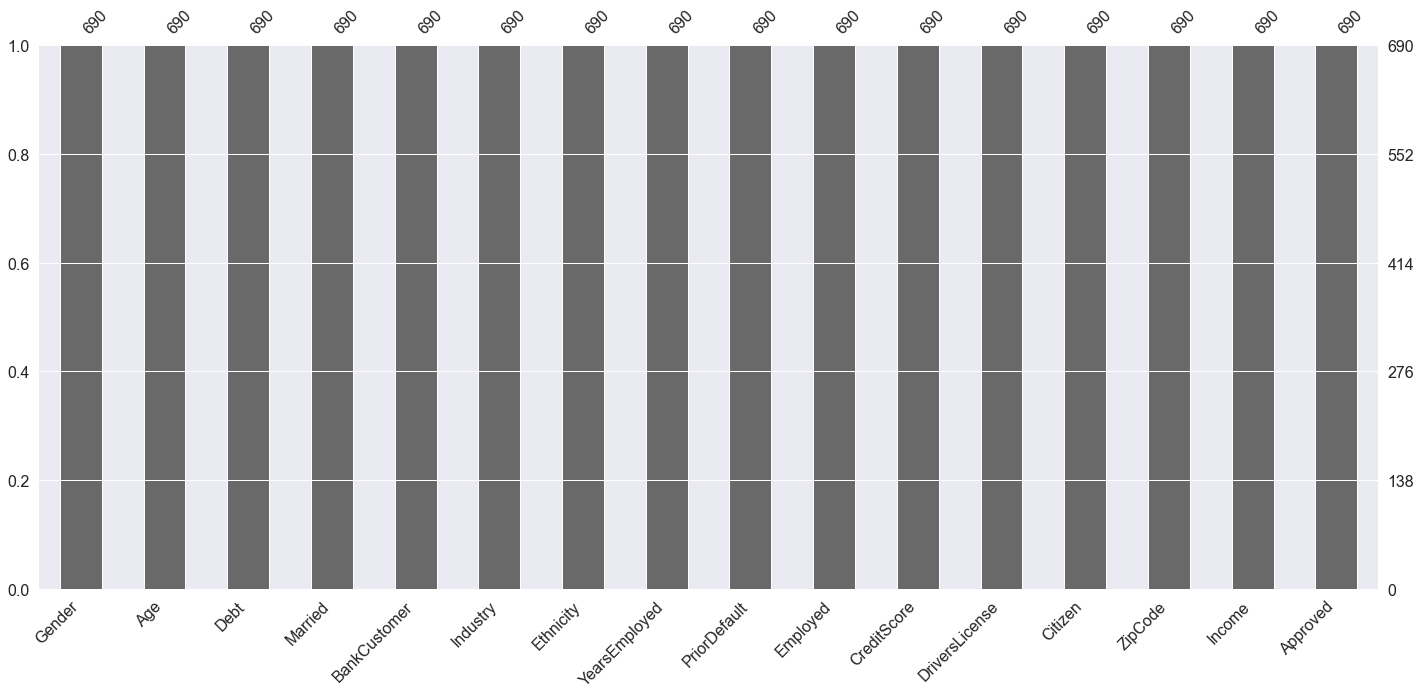

In [80]:
msno.bar(df)

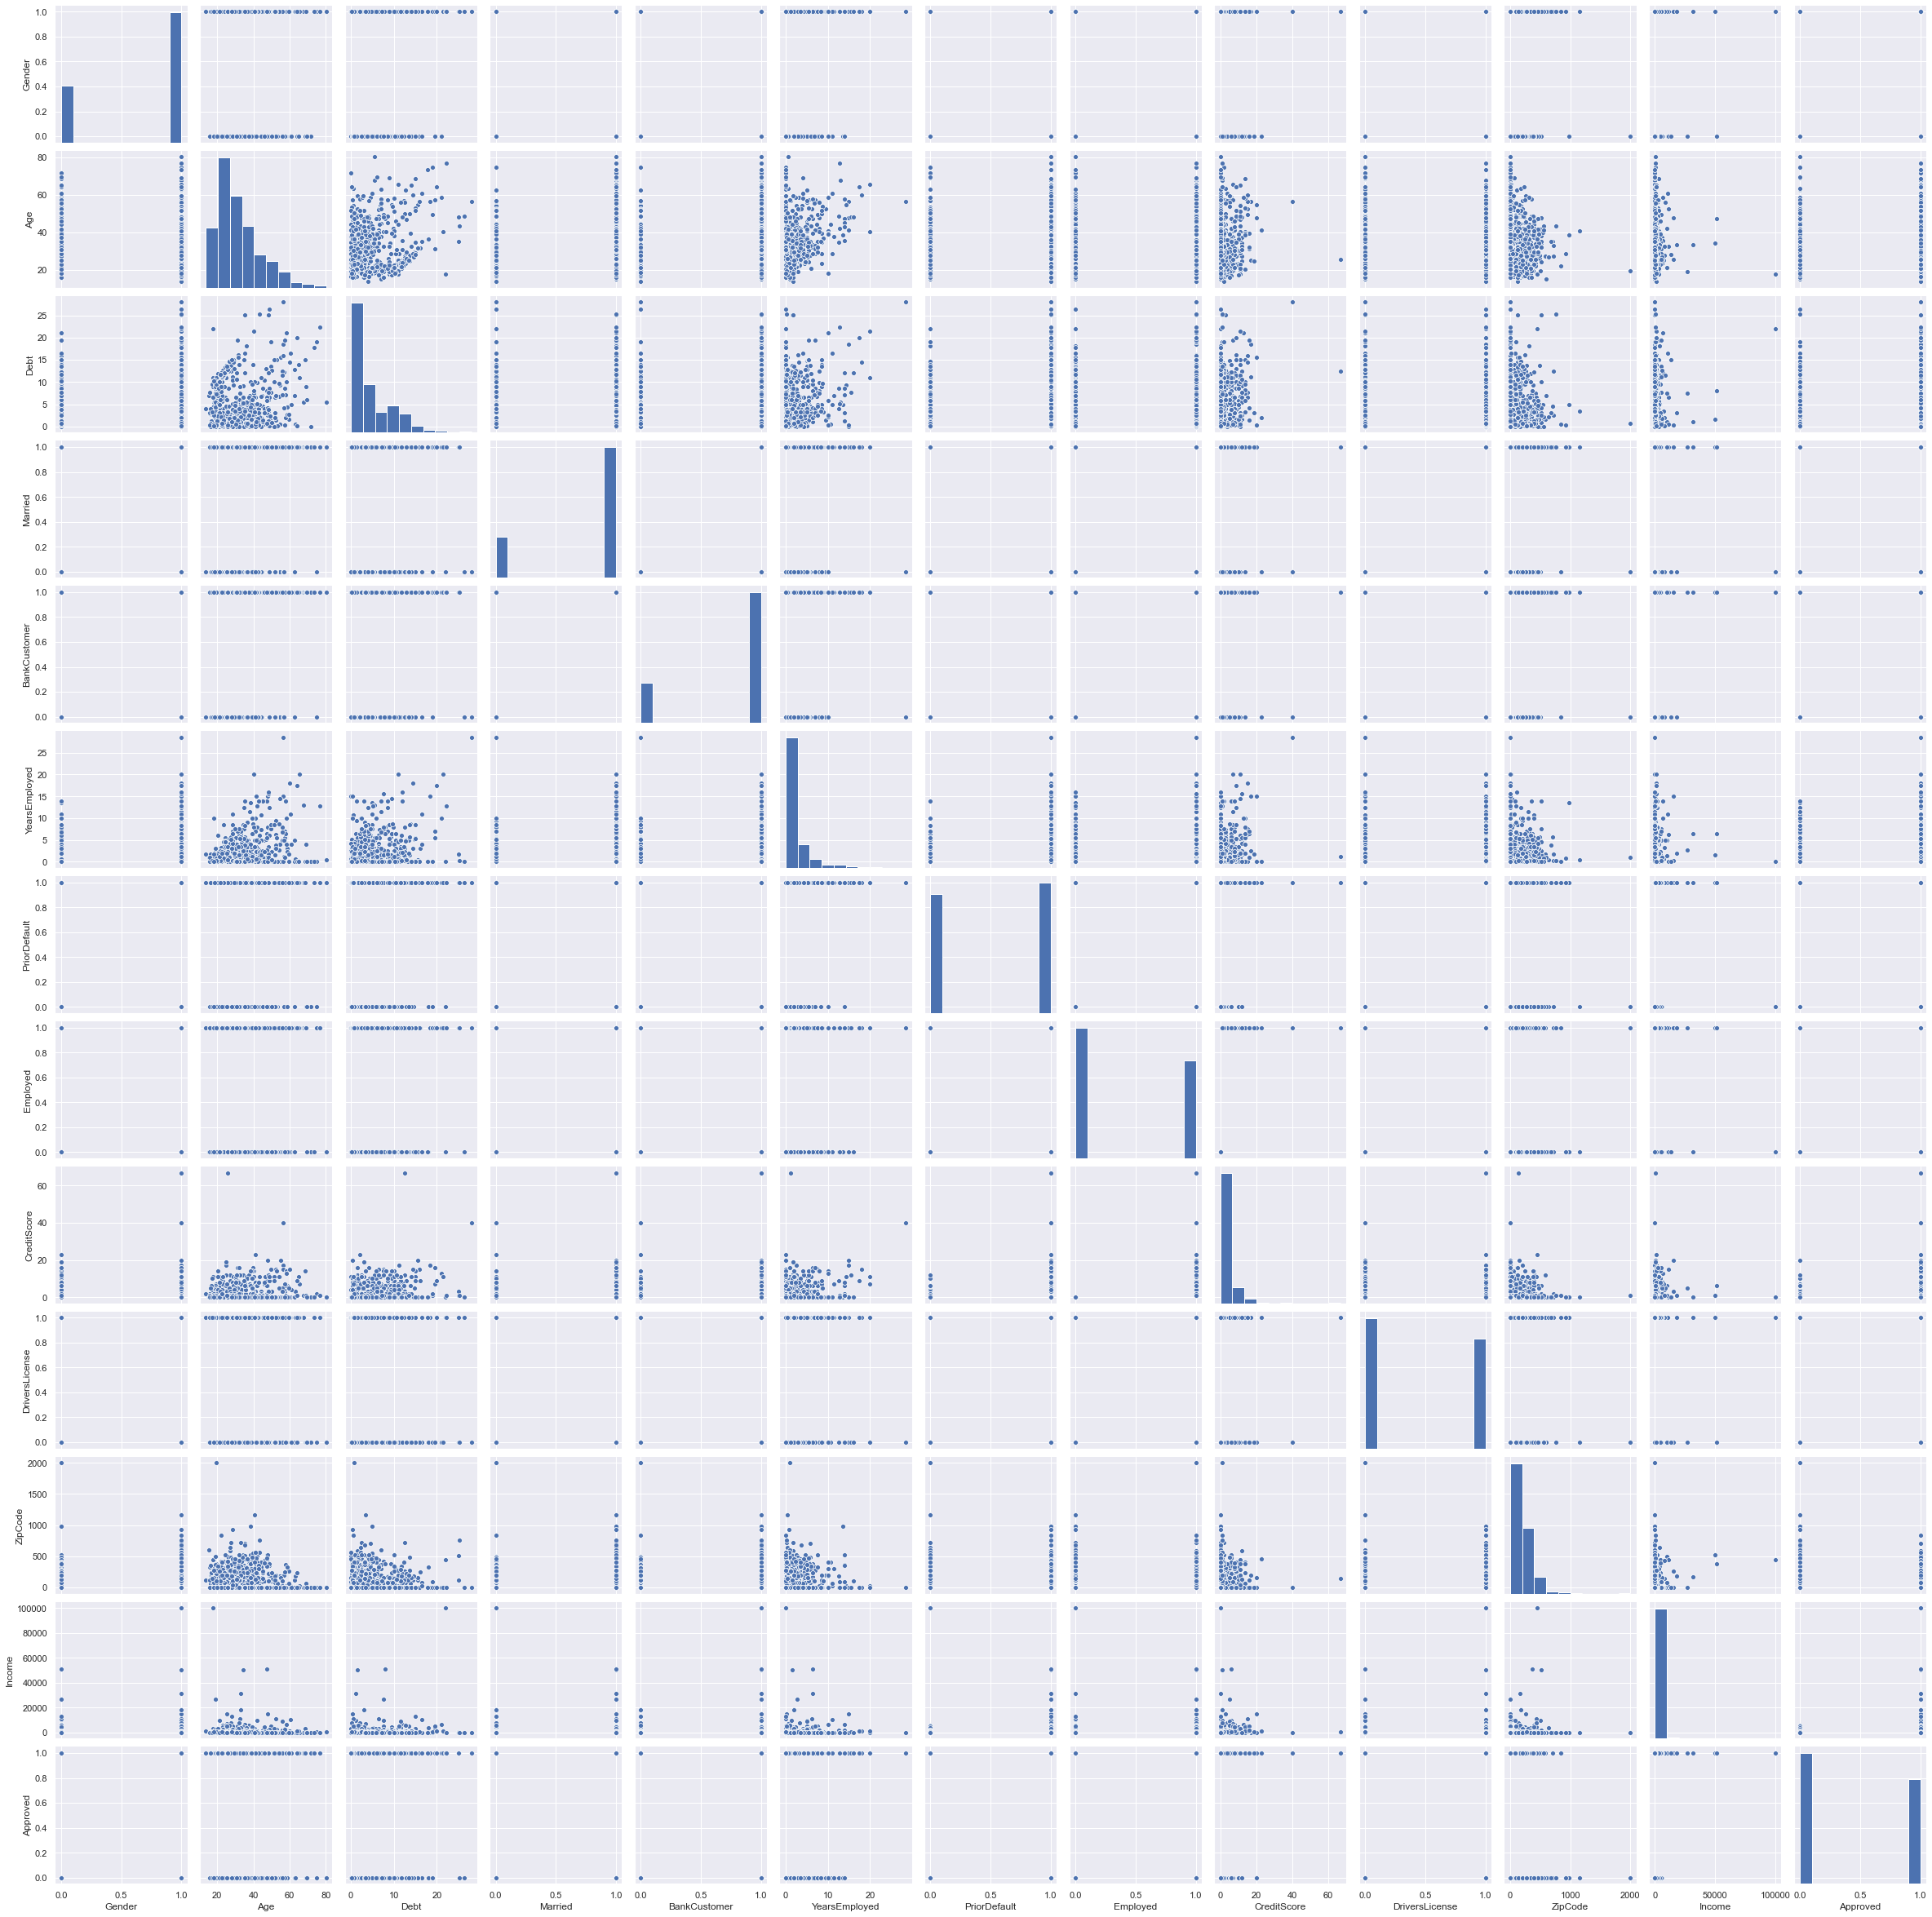

In [81]:
sb.pairplot(df)

#### Exploratory Data analysis

In [82]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [83]:
round(df.describe(), 2)

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00
mean,0.70,31.51,4.76,0.76,0.76,2.22,0.52,0.43,2.40,0.46,180.55,1017.39,0.44
std,0.46,11.86,4.98,0.43,0.43,3.35,0.50,0.50,4.86,0.50,173.97,5210.10,0.50
min,0.00,13.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,22.67,1.00,1.00,1.00,0.16,0.00,0.00,0.00,0.00,60.00,0.00,0.00
50%,1.00,28.46,2.75,1.00,1.00,1.00,1.00,0.00,0.00,0.00,160.00,5.00,0.00
75%,1.00,37.71,7.21,1.00,1.00,2.62,1.00,1.00,3.00,1.00,272.00,395.50,1.00
max,1.00,80.25,28.00,1.00,1.00,28.50,1.00,1.00,67.00,1.00,2000.00,100000.00,1.00


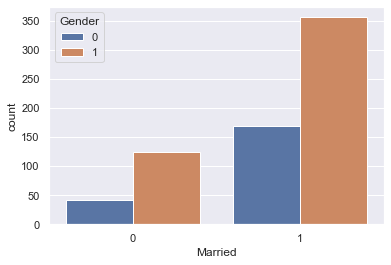

In [84]:
sb.countplot(df['Married'], hue = df['Gender'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

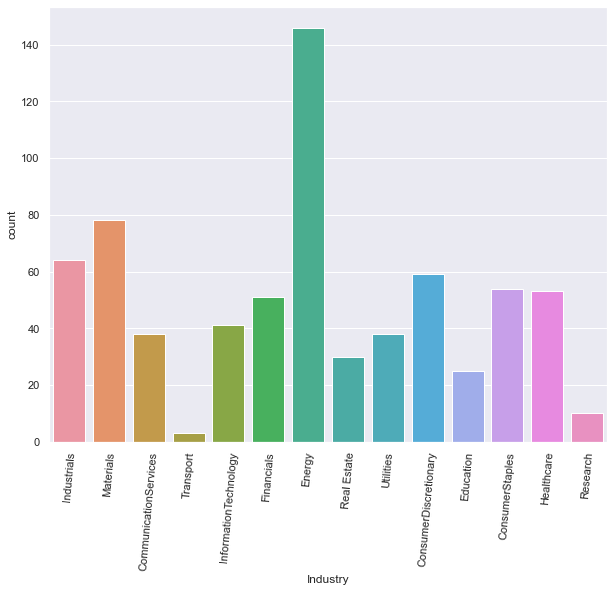

In [85]:
plt.figure(figsize = (10, 8))
sb.countplot(df['Industry'])
plt.xticks(rotation = 85)

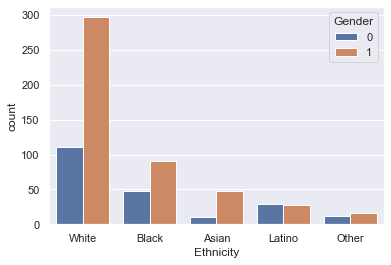

In [86]:
sb.countplot(df['Ethnicity'], hue = df['Gender'])

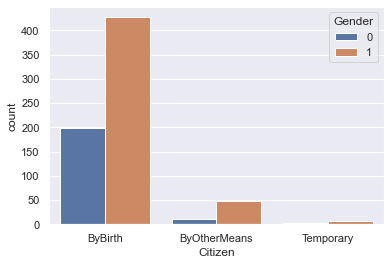

In [87]:
sb.countplot(df['Citizen'], hue = df['Gender'])

#### Feature Engineering

In [88]:
df.head(2)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.00,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.46,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1


#### Use label Encoder to transform textual format to numerical figure in series

In [89]:
#objects = [x for x in df.columns if any(x == df('object'))]
le = LabelEncoder()
df['Industry'] = le.fit_transform(df['Industry'])
df['Ethnicity'] = le.fit_transform(df['Ethnicity'])
df['Citizen'] = le.fit_transform(df['Citizen'])
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,1,120,0,1


#### Train and Test the dataset

In [90]:
x = df.drop(columns = ('Approved')) # Predictor Variable
y = df['Approved'] # Target / Outcome Variable

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#### Build instance of a model

In [92]:
dtr = DecisionTreeRegressor()

dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [95]:
dtr_pred = dtr.predict(x_train)
dtr_pred

array([1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1.

In [99]:
acc_score = accuracy_score(y_train, dtr_pred)
acc_score

1.0

In [101]:
cls_report = classification_report(y_train, dtr_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       1.00      1.00      1.00       254

    accuracy                           1.00       552
   macro avg       1.00      1.00      1.00       552
weighted avg       1.00      1.00      1.00       552



In [107]:
df.head(2)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.00,1,1,7,4,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.46,1,1,9,1,3.04,1,1,6,0,0,43,560,1


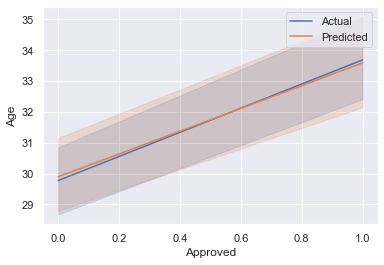

In [119]:
sb.lineplot(df['Approved'], df['Age'], label = 'Actual')
sb.lineplot(dtr_pred, x_train['Age'], label = 'Predicted')
plt.legend()